In [116]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error
from sklearn import linear_model

In [117]:
X = pd.read_csv('14_x.csv', names=['x1','x2','x3','x4','x5', 'x6', 'x7'], header=None)
Y = pd.read_csv('14_y.csv',names=['Y'], header=None)

In [135]:
X

,x1,x2,x3,x4,x5,x6,x7
0,0.554492,0.435362,-0.714326,0.764385,0.332318,1.690328,1.084469
1,-1.443801,0.171249,0.356806,0.292753,-1.160146,0.640056,-0.187040
2,-1.671787,1.196110,-0.055890,0.015570,-0.850735,-1.381808,0.628972
3,0.779561,0.862201,1.331771,0.000843,0.613557,-0.534753,-2.266841
4,0.513284,0.719624,-0.261018,0.861236,-0.535846,-1.949803,0.813672
5,0.437861,0.527150,-1.519209,-0.920765,0.195468,-0.527456,0.704727
6,0.905799,-0.348567,-0.975581,1.072600,0.778013,2.895179,0.474996
7,-0.212832,-0.622724,0.486118,-1.258866,-2.370847,1.513594,0.431967
8,-0.830086,-1.158022,0.624042,-0.708330,1.640596,-1.368226,-1.527605
9,0.265245,-0.631375,-0.586314,2.458434,0.604669,-1.727498,0.636303


In [119]:
Y

,Y
0,290.566394
1,-84.794649
2,-172.588003
3,-2.000061
4,-64.390405
5,61.236347
6,356.697521
7,48.997911
8,-300.603777
9,-138.449438


### 3.Сделайте количественное описание датасета: количество точек данных, признаков, статистику по каждому признаку.

In [120]:
X.shape

(56, 7)

In [121]:
Y.shape

(56, 1)

In [122]:
X.describe()

,x1,x2,x3,x4,x5,x6,x7
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,0.142717,-0.068633,-0.011395,0.121132,-0.036860,-0.040398,-0.208072
std,0.999849,0.879561,1.014071,1.078122,1.015872,1.086111,1.173085
min,-1.860966,-2.156795,-1.604093,-2.350153,-2.370847,-1.949803,-2.934813
25%,-0.531781,-0.623204,-0.775599,-0.550109,-0.629991,-0.788702,-0.933554
50%,0.069058,-0.073099,-0.051117,0.067525,0.039334,-0.187428,-0.025557
75%,0.700505,0.460669,0.460778,0.749303,0.606891,0.586793,0.595408
max,3.305131,2.274336,4.121699,2.621316,2.650815,2.895179,1.911460


In [123]:
Y.describe()

,Y
count,56.000000
mean,-10.086063
std,158.625531
min,-346.530017
25%,-128.343173
50%,-27.394523
75%,91.513956
max,356.697521


### 4.Разделите все наблюдения на обучающую и тестовую выборки в соотношении 80-20.

In [124]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [125]:
x_train.shape, y_train.shape

((44, 7), (44, 1))

In [126]:
x_test.shape, y_test.shape

((12, 7), (12, 1))

### 5.Для целевой и каждого из признаков постройте парную регрессионную модель. Визуализируйте линию регрессии и исходные данные на графике. При помощи коэффициентов оцените силу связи.

In [127]:
reg1 = linear_model.LinearRegression()
reg1.fit(x_train, y_train)

LinearRegression()

In [128]:
reg1.score(X, Y)

0.9976946159480403

In [129]:
x_train.columns

Index(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7'], dtype='object')

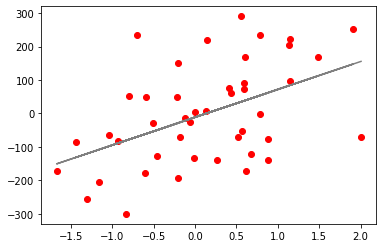

Коэффициент:  83.34419018492014


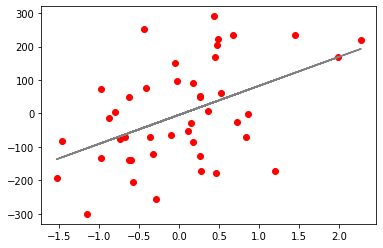

Коэффициент:  86.73212134953471


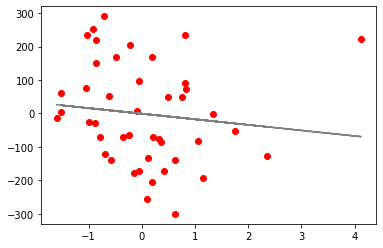

Коэффициент:  -16.65151875394106


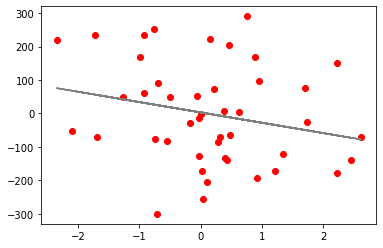

Коэффициент:  -30.873891112501305


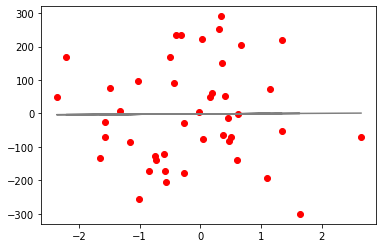

Коэффициент:  0.9455664696360315


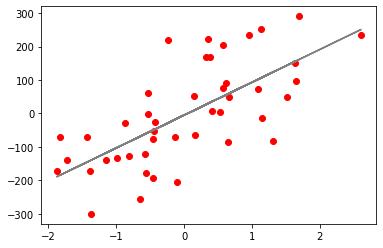

Коэффициент:  98.20571903912182


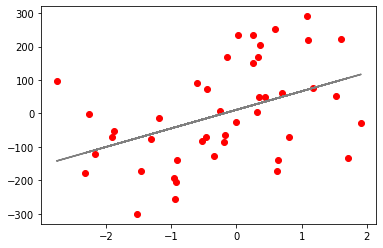

Коэффициент:  55.498327819391704


In [161]:
regs_list = []

for col in range(len(x_train.columns)):
    vals = x_train.iloc[:, col]
    lin_reg = linear_model.LinearRegression()
    lin_reg.fit(vals.values.reshape(-1, 1), y_train)
    regs_list.append(lin_reg)

    plt.figure() #строим график
    plt.scatter(vals, y_train, color='RED') #реальные данные
    plt.plot(vals, lin_reg.predict(vals.values.reshape(-1, 1)), color='GREY') #предсказанные
    plt.show()

    print("Коэффициент: ", lin_reg.coef_[0][0])

    # print('ПО СТОЛБЦУ НОМЕР: ', col + 1)
    # new_reg = linear_model.LinearRegression().fit(x_train.iloc[col].values.reshape((-1, 1)), y_train) #создали модель


    # print('Score: ', new_reg.score(x_test[col].values.reshape((-1,1)), y_test)) #выводим score на тестовой выборке
    # print('Коэффициент: ', new_reg.coef_)
    # regs_list.append(new_reg) #сохраняем в список модель

    # plt.figure() #строим график
    # plt.scatter(X[col], Y, color='r') #реальные данные
    # plt.plot(X[col], lin_reg.predict(X[col].values.reshape((-1, 1))), color='g') #предсказанные
    # plt.show()

    # #парочка примеров с предсказанием для наглядности
    # print('Примеры предсказания:')
    # empt_data = {'Реально':[],
    #             'Предсказано':[]}
    # some_exmpl = pd.DataFrame(empt_data, columns = ['Реально', 'Предсказано'])
    # some_exmpl['Реально'] = Y[0][0:5]
    # some_exmpl['Предсказано'] = new_reg.predict(X[col].iloc[0:5].values.reshape((-1,1)))
    # print(some_exmpl)
    #
    # print('\n\n\n')

In [165]:
multiple_lin_reg = LinearRegression()
multiple_lin_reg.fit(x_train,y_train)
multiple_lin_reg.score(x_train,y_train)

0.9970645015178938

Дополнительные задания
Для целевой переменной и каждого из признаков постройте полиномиальную регрессию второго, третьего и десятого порядков. Сделайте вывод о значимости регрессии.
Постройте сводную таблицу показателей точности всех построенных моделей по тестовой и обучающей выборке. Сделайте вывод, какие модели переобученнные, какие - недообученные.
Используйте другие метрики качества регрессионной модели в дополнение к коэффициенту детерминации.
(*) Повторите те же действия на датасетах из данной папки. Замерьте время обучения на разных датасетах и количестве признаков. Сделайте вывод о зависимости скорости обучения от объема обучающей выборки.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)
X_pol_train = poly_reg.fit_transform(x_train.iloc[:, 0])
X_pol_test = poly_reg.fit_transform(x_test.iloc[:, 0])

poly2 = PolynomialFeatures(degree = 2)
poly3 = PolynomialFeatures(degree = 3)
poly10 = PolynomialFeatures(degree = 10)

x_poly2 = poly2.fit_transform(x_train.iloc[:, 0].values.reshape((-1, 1))) #полином 2-ого порядка
lin_reg2 = linear_model.LinearRegression().fit(x_poly2, y_train)

x_poly3 = poly3.fit_transform(x_train[col].values.reshape((-1, 1))) #полином 3-ого порядка
new_reg3 = linear_model.LinearRegression().fit(x_poly3, y_train)

x_poly10 = poly10.fit_transform(x_train[col].values.reshape((-1, 1))) #полином 10-ого порядка
new_reg10 = linear_model.LinearRegression().fit(x_poly10, y_train)

In [197]:
from sklearn.preprocessing import PolynomialFeatures

r2_2 = []
r2_3 = []
r2_10 = []

r2 = []
mse = []

for col in range(len(x_train.columns)):
    poly2 = PolynomialFeatures(degree = 2)
    poly3 = PolynomialFeatures(degree = 3)
    poly10 = PolynomialFeatures(degree = 10)

    vals = x_train.iloc[:, col]

    poly2_linreg = poly2.fit_transform(vals.values.reshape((-1, 1))) #полином 2-ого порядка
    lin_reg2 = linear_model.LinearRegression().fit(poly2_linreg, y_train)

    poly3_linreg = poly3.fit_transform(vals.values.reshape((-1, 1))) #полином 3-ого порядка
    lin_reg3 = linear_model.LinearRegression().fit(poly3_linreg, y_train)

    poly10_linreg = poly10.fit_transform(vals.values.reshape((-1, 1))) #полином 10-ого порядка
    lin_reg10 = linear_model.LinearRegression().fit(poly10_linreg, y_train)

    poly2_r2 = lin_reg2.score(poly2_linreg, y_train)
    poly3_r2 = lin_reg3.score(poly3_linreg, y_train)
    poly10_r2 = lin_reg10.score(poly10_linreg, y_train)

    r2.append([poly2_r2, poly3_r2, poly10_r2])
    mse.append([mean_squared_error(Y_test, y_train)])

    print(f"Score X{col+1}: {poly2_r2}")
    print(f"Coeffs X{col+1}: {lin_reg2.coef_}\n")

    print(f"Score X{col+1}: {poly3_r2}")
    print(f"Coeffs X{col+1}: {lin_reg3.coef_}\n")

    print(f"Score X{col+1}: {poly10_r2}")
    print(f"Coeffs X{col+1}: {lin_reg10.coef_}\n\n\n{'-'*100}")

Score X1: 0.23688730199300645
Coeffs X1: [[  0.          86.48019585 -13.62646457]]

Score X1: 0.23702214740339322
Coeffs X1: [[  0.          89.65451134 -12.53957917  -1.80076685]]

Score X1: 0.3626489249789395
Coeffs X1: [[    0.           276.48375815  -147.39781065 -1190.73286456
    573.67626561  1757.94362494  -795.51799908  -897.22898015
    415.73389435   147.95621921   -70.64006632]]


----------------------------------------------------------------------------------------------------
Score X2: 0.22657013953755656
Coeffs X2: [[ 0.         88.28287309 -3.50534581]]

Score X2: 0.23139736573883496
Coeffs X2: [[  0.          69.35105483 -14.27266475  10.44284166]]

Score X2: 0.358408343968074
Coeffs X2: [[    0.           156.59109373   729.09563364   -32.50282405
  -1818.11837957  -409.97019274  1423.47330139   348.62701125
   -456.94829675   -70.67431935    55.51349966]]


----------------------------------------------------------------------------------------------------
Score 

In [198]:
r2

[[0.23688730199300645, 0.23702214740339322, 0.3626489249789395],
 [0.22657013953755656, 0.23139736573883496, 0.358408343968074],
 [0.14166522353193922, 0.15570544441725398, 0.27917227788710874],
 [0.0684391317065497, 0.07447027018647434, 0.2191313324740446],
 [0.008304118405384808, 0.06181279003871931, 0.306745458080267],
 [0.47904442093461375, 0.48913821714706807, 0.5792286007989903],
 [0.18612838630027118, 0.38394219420014486, 0.5224545514452357]]

In [221]:
print("R2 for ")
for i in range(len(r2)):
    print(f"x{i}: {r2[i]}")
    # for j in r2[i]:
    #     print(round(j, 3), end="")
        # print("x",i, end="")

R2 for 
x0: [0.23688730199300645, 0.23702214740339322, 0.3626489249789395]
x1: [0.22657013953755656, 0.23139736573883496, 0.358408343968074]
x2: [0.14166522353193922, 0.15570544441725398, 0.27917227788710874]
x3: [0.0684391317065497, 0.07447027018647434, 0.2191313324740446]
x4: [0.008304118405384808, 0.06181279003871931, 0.306745458080267]
x5: [0.47904442093461375, 0.48913821714706807, 0.5792286007989903]
x6: [0.18612838630027118, 0.38394219420014486, 0.5224545514452357]
